# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [10]:
# Load pickled data
import pickle
import os.path
import zipfile

# TODO: Fill this in based on where you saved the training and testing data

training_file = "train.p"
validation_file = "valid.p"
testing_file = "test.p"

zip_file = "traffic-signs-data.zip"

if (not os.path.isfile(training_file) or
   not os.path.isfile(validation_file) or
    not os.path.isfile(testing_file)):
    print("Attempting to extract data from " + zip_file)
    zip_ref = zipfile.ZipFile(zip_file, 'r')
    zip_ref.extractall(".")
    zip_ref.close()
    print("Files extracted OK")
        
with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print("Loaded data OK")

Loaded data OK


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [54]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# TODO: Number of training examples
n_train = np.shape(X_train)[0]

# TODO: Number of validation examples
n_validation = np.shape(X_valid)[0]

# TODO: Number of testing examples.
n_test = np.shape(X_test)[0]

# TODO: What's the shape of an traffic sign image?
image_shape = np.shape(X_train[0])

# TODO: How many unique classes/labels there are in the dataset.
# CW: Since the next cell invites us to plot the number of each class, I am counting
# how many instances of each we have here, rather than just their existence (which would be
# sufficient to count how many different classes we have), and saving the first example
# of each class
classes_found = {}
first_example = {}
for i in range(len(y_train)):
    klass = y_train[i]
    if klass not in classes_found:
        first_example[klass] = X_train[i]
        classes_found[klass] = 1
    else:
        classes_found[klass] += 1
# I now know there aren't any validation or test classes not in the training set,
# so I'm skipping caching the first examples of any new class from here onwards
for klass in y_valid:
    if klass not in classes_found:
        print("WARNING: class in validation set but not training set: " + str(klass))
        classes_found[klass] = 1
    else:
        classes_found[klass] += 1
for klass in y_test:
    if klass not in classes_found:
        print("WARNING: class in test set but not training set: " + str(klass))
        classes_found[klass] = 1
    else:
        classes_found[klass] += 1
n_classes = len(classes_found)

print("Number of training examples =", n_train)
print("Number of validation examples = ", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples =  4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

Class ID=0 first example: 


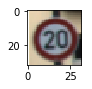

Class ID=1 first example: 


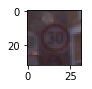

Class ID=2 first example: 


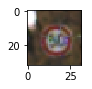

Class ID=3 first example: 


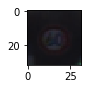

Class ID=4 first example: 


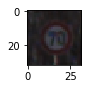

Class ID=5 first example: 


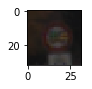

Class ID=6 first example: 


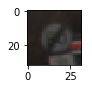

Class ID=7 first example: 


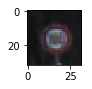

Class ID=8 first example: 


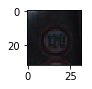

Class ID=9 first example: 


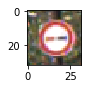

Class ID=10 first example: 


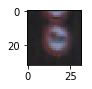

Class ID=11 first example: 


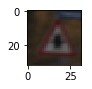

Class ID=12 first example: 


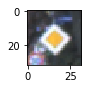

Class ID=13 first example: 


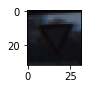

Class ID=14 first example: 


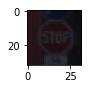

Class ID=15 first example: 


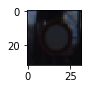

Class ID=16 first example: 


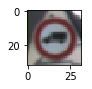

Class ID=17 first example: 


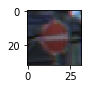

Class ID=18 first example: 


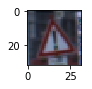

Class ID=19 first example: 


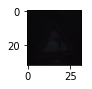

Class ID=20 first example: 


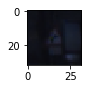

Class ID=21 first example: 


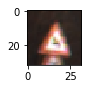

Class ID=22 first example: 


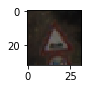

Class ID=23 first example: 


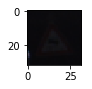

Class ID=24 first example: 


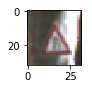

Class ID=25 first example: 


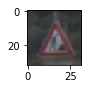

Class ID=26 first example: 


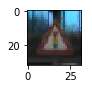

Class ID=27 first example: 


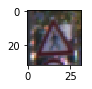

Class ID=28 first example: 


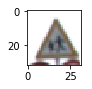

Class ID=29 first example: 


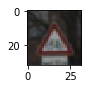

Class ID=30 first example: 


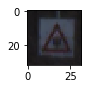

Class ID=31 first example: 


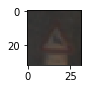

Class ID=32 first example: 


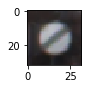

Class ID=33 first example: 


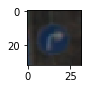

Class ID=34 first example: 


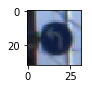

Class ID=35 first example: 


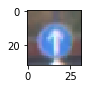

Class ID=36 first example: 


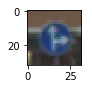

Class ID=37 first example: 


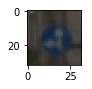

Class ID=38 first example: 


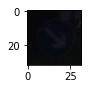

Class ID=39 first example: 


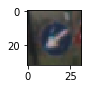

Class ID=40 first example: 


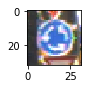

Class ID=41 first example: 


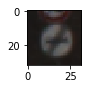

Class ID=42 first example: 


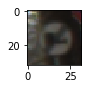

In [55]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

klasses = list(first_example.keys())
klasses.sort() # now in numerical order of class ID
max_examples_to_show = 100 # for debug was just displaying first couple

# CW: I saved the first example of each image above when loading them, so
# now just have to display each one
for klass_idx in range(min(len(klasses), max_examples_to_show)):
    klass_id = klasses[klass_idx]
    image = first_example[klass_id]

    print("Class ID=" + str(klass_id) + " first example: ")
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show() # Explicitly calling show() so it appears before next text line I want to output


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [1]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.

# CW to start with I want to keep the images in colour, because I feel there is useful information
# encoded in that colour, e.g. the red border round speed signs.
# Looking at the example images though, the brightness varies a lot, so I will try and normalise
# for brightness, as well as getting the data into a near -1 to 1 range

import numpy as np

def normalise_one_image(colour_image_array):
    # Quick hack to do simpler normalisation for comparison (not ultimately used):
    # new_image = colour_image_array / 128.0
    # new_image -= 1.0
    # return new_image

    (y_size, x_size, num_colours) = np.shape(colour_image_array)
    new_image = np.zeros(np.shape(colour_image_array))
    min_value = np.min(colour_image_array)
    max_value = np.max(colour_image_array)
    # Normalise so that darkest value is -1, brightest is +1, irrespective of colour
    observed_value_range = float(max_value - min_value)
    desired_min_value = -1.0
    desired_max_value = +1.0
    desired_range = desired_max_value - desired_min_value
    for y_coord in range(y_size):
        for x_coord in range(x_size):
            scale_factor = desired_range / observed_value_range
            for colour_idx in range(num_colours):
                # shift point colour values so that the lowest RGB value of any pixel in any
                # colour channel is zero
                pixel_colour_value = float(colour_image_array[y_coord][x_coord][colour_idx])
                pixel_colour_value -= min_value
                # scale so the range of intensities across the whole image matches our desired range
                pixel_colour_value *= scale_factor
                # offset so we get values in the desired range
                pixel_colour_value += desired_min_value
                new_image[y_coord][x_coord][colour_idx] = pixel_colour_value
        
    return new_image

def normalise_image_set(image_set_array):
    new_image_set = []
    debug_set_size_limit = 100000000 # during debugging limited to a few images to save processing time
    count = 0
    for image in image_set_array:
        new_image = normalise_one_image(image)
        new_image_set.append(new_image)
        count += 1
        if count >= debug_set_size_limit:
            break
    return new_image_set


In [11]:
# Apply normalisation preprocessing to the specific training and test data

print("Normalising image data...")
x_train_norm = normalise_image_set(X_train)
x_valid_norm = normalise_image_set(X_valid)
x_test_norm = normalise_image_set(X_test)
print("... normalisation complete")

# Write it all to a file so we don't have to run normalisation again
with open("normalised_data.p", mode='wb') as f:
    pickle.dump(x_train_norm, f)
    pickle.dump(y_train, f)
    pickle.dump(x_valid_norm, f)
    pickle.dump(y_valid, f)
    pickle.dump(x_test_norm, f)
    pickle.dump(y_test, f)

print("Normalised data written to file")

Normalising image data...
... normalisation complete
Normalised data written to file


### Model Architecture

Run from here to reload saved normalised data

In [6]:
# CW: this is basically my implementation of the previous LeNet exercise, but modified to
# a) work with 3 colours (or indeed any number, still works with greyscale now it is a parameter) and
# b) work with a variable convolutional layer 1 depth -- increasing this from LeNet's 6 improved performance
#    significantly with the traffic signs, enough to exceed the project target, so that's as far as I went
#    in experimenting with model architecture
# c) save some tensors by name to allow retrieval during later analysis (esp logit values)

def LeNet(x, num_classes, num_colours, layer1_depth):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu_w = 0
    sigma_w = 0.1 # Initial weights clustered around zero reasonably tightly
    mu_b = 0
    sigma_b = 0.02 # I have a little bit of noise in the initial biases too, experimentally
    
    # TODO: Layer 1: Convolutional. Input = 32x32x[colour chans]. Output = 28x28xlayer1_depth.
    # CW: if the output is 28x28, implies we have a 5x5 filter patch
    layer1_weights = tf.Variable(tf.truncated_normal(shape=(5,5,num_colours,layer1_depth), mean=mu_w, stddev=sigma_w), name='layer1_weights')
    layer1_biases = tf.Variable(tf.truncated_normal([layer1_depth], mu_b, sigma_b), name='layer1_biases')
    layer1_strides = [1, 1, 1, 1] # i.e. no striding
    layer1_padding = 'VALID' # hence we went down from 32 to 28
    layer1_conv_pre_bias = tf.nn.conv2d(x, layer1_weights, strides=layer1_strides,
                                        padding=layer1_padding, name='layer1_conv_pre_bias')
    layer1_conv_post_bias = tf.add(layer1_conv_pre_bias,layer1_biases, name='layer1_conv_post_bias')

    # TODO: Activation.
    # CW: no direction as to function so guessing
    layer1_activation = tf.nn.relu(layer1_conv_post_bias)

    # TODO: Pooling. Input = 28x28x6. Output = 14x14x12.
    layer1_pool_ksize = [1,2,2,1] # batch, 2x2 height/width, pool x/y only
    layer1_pool_strides = [1, 2, 2, 1] # batch, 2x2 height/width stride, 1=depth stride
    layer1_pool_padding = 'VALID'
    layer1_pooled = tf.nn.max_pool(layer1_activation, layer1_pool_ksize, 
                                   layer1_pool_strides, layer1_pool_padding)

    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    # CW: if the output is 10x10 from 14x14, implies we have a 5x5 filter patch
    layer2_weights = tf.Variable(tf.truncated_normal([5,5,layer1_depth,16], mu_w, sigma_w))
    layer2_biases = tf.Variable(tf.truncated_normal([16], mu_b, sigma_b))
    layer2_strides = [1, 1, 1, 1] # i.e. no striding
    layer2_padding = 'VALID' # hence we went down from 14 to 10
    layer2_conv_pre_bias = tf.nn.conv2d(layer1_pooled, layer2_weights, strides=layer2_strides,
                                        padding=layer2_padding)
    layer2_conv_post_bias = layer2_conv_pre_bias + layer2_biases
    
    # TODO: Activation.
    # CW: no direction as to function so guessing
    layer2_activation = tf.nn.relu(layer2_conv_post_bias)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    layer2_pool_ksize = [1,2,2,1] # batch, 2x2 height/width, output depth pooling xy only
    layer2_pool_strides = [1, 2, 2, 1] # batch, 2x2 stride in 1=height/depth only
    layer2_pool_padding = 'VALID'
    layer2_pooled = tf.nn.max_pool(layer2_activation, layer2_pool_ksize, 
                                   layer2_pool_strides, layer2_pool_padding)

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2_flattened = tf.contrib.layers.flatten(layer2_pooled)
    
    # TODO: Layer 3: Fully Connected. Input = 400. Output = 120.
    layer3_weights = tf.Variable(tf.truncated_normal([400,120], mu_w, sigma_w))
    layer3_biases =tf.Variable( tf.truncated_normal([120], mu_b, sigma_b))
    layer3_pre_bias = tf.matmul(layer2_flattened,layer3_weights)
    layer3_post_bias = layer3_pre_bias + layer3_biases
    
    # TODO: Activation.
    # CW: no direction as to function so guessing
    layer3_activation = tf.nn.relu(layer3_post_bias)

    # TODO: Layer 4: Fully Connected. Input = 120. Output = 84.
    layer4_weights = tf.Variable( tf.truncated_normal([120,84], mu_w, sigma_w))
    layer4_biases = tf.Variable(tf.truncated_normal([84], mu_b, sigma_b))
    layer4_pre_bias = tf.matmul(layer3_activation, layer4_weights)
    layer4_post_bias = layer4_pre_bias + layer4_biases
    
    # TODO: Activation.
    # CW: no direction as to function so guessing
    layer4_activation = tf.nn.relu(layer4_post_bias)

    # TODO: Layer 5: Fully Connected. Input = 84. Output = num_classes.
    layer5_weights = tf.Variable(tf.truncated_normal([84,num_classes], mu_w, sigma_w))
    layer5_biases = tf.Variable(tf.truncated_normal([num_classes], mu_b, sigma_b))
    layer5_pre_bias = tf.matmul(layer4_activation, layer5_weights)
    layer5_post_bias = layer5_pre_bias + layer5_biases

    # I had softmax but solution used output directly
    logits = tf.nn.softmax(layer5_post_bias, name='logits')
    #logits = layer5_post_bias
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [1]:
# This is required by both training and final testing cells
def evaluate(sess, accuracy_operation, X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    #sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [8]:
### Train your model here.
import numpy as np

def debug_to_gray(x):
    "For some experiments converted colour image to greyscale"
    gray_array = []
    for i in range(len(x)):
        rgb_image = x[i]
        gray_image = np.dot(rgb_image, [0.299,0.587,0.114]).reshape((32,32,1))
        x[i] = gray_image
        gray_array.append(gray_image)
    return gray_array
        
def debug_limit_classes(x_set, y_set, max_classes):
    "Restrict to a smaller number of classes to make training easier during debugging"
    limited_x = []
    limited_y = []
    for x,y in zip(x_set, y_set):
        if y < max_classes:
            limited_x.append(x)
            limited_y.append(y)
    return limited_x, limited_y


# Start by loading previously normalised data
import pickle

print("Retrieving normalised data from file...")
with open("normalised_data.p", mode='rb') as f:
    x_train_norm = pickle.load(f)
    y_train      = pickle.load(f)
    x_valid_norm = pickle.load(f)
    y_valid      = pickle.load(f)
    x_test_norm  = pickle.load(f)
    y_test       = pickle.load(f)
print("... data loaded.")

##############################################
#  Hyperparameters
num_colours = 3  # 1 greyscale, 3 colour
EPOCHS = 700
BATCH_SIZE = 256
# rate = 0.0003 # now experimenting with dynamic learning rate
layer1_depth=24 # LeNet was 6, experimenting
##############################################

if num_colours < 3:
    x_train_norm = debug_to_gray(x_train_norm)
    x_valid_norm = debug_to_gray(x_valid_norm)
    x_test_norm = debug_to_gray(x_test_norm)

# During debug experiments, cut down number of classes to reduce dataset size
#debug_limit_max_classes = 5
#x_train_norm, y_train = debug_limit_classes(x_train_norm, y_train, debug_limit_max_classes)
#x_valid_norm, y_valid = debug_limit_classes(x_valid_norm, y_valid, debug_limit_max_classes)
#x_test_norm, y_test = debug_limit_classes(x_test_norm, y_test, debug_limit_max_classes)

# shuffle as per LeNet exercise
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train_norm, y_train)

# Find range of class label numbers so we can map them to a one-hot vector;
# in the initial data analysis, we already checked that all of the labels
# occur in the training set
y_min = np.min(y_train)
y_max = np.max(y_train)
num_classes = y_max - y_min + 1
print("num_classes = " + str(num_classes))


import tensorflow as tf
import sys

#CW define placeholders for input training data
x = tf.placeholder(tf.float32, (None, 32, 32, num_colours), name='x')
y = tf.placeholder(tf.int32, (None), name='y')

# Now using dynamic learning rate -- start relatively quick, progressively slow down for better convergence
dynamic_rate = tf.placeholder(tf.float32, (None), name='dynamic_rate')

#CW map output class numbers to one-hot encoded vector
one_hot_y = tf.one_hot(y, num_classes, name='one_hot_y')

# Training pipeline from LeNet lab
logits = LeNet(x, num_classes, num_colours, layer1_depth)

cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits, name='cross_entropy')
loss_operation = tf.reduce_mean(cross_entropy, name='loss_operation')
optimizer = tf.train.AdamOptimizer(learning_rate = dynamic_rate, name='optimizer')
training_operation = optimizer.minimize(loss_operation, name='training_operation')

# evaluation from LeNet
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1), name='correct_prediction')
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='accuracy_operation')
saver = tf.train.Saver()


### Calculate and report the accuracy on the training and validation set.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(x_train)
    
    print("Training with EPOCHS=%d BATCH_SIZE=%d rate=<dynamic> num_colours=%d layer1 depth=%d" % (EPOCHS, BATCH_SIZE, num_colours, layer1_depth))
    print()
    # tab-delimited file headings for easy Excel import
    print("Epochs\tValidation Accuracy")

    for epoch_idx in range(EPOCHS):
        x_train, y_train = shuffle(x_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = x_train[offset:end], y_train[offset:end]
            rate = 0.1 / (epoch_idx + 100) # start fast, slow down to get better ultimate convergence
            (to, lo, ohy) = sess.run((training_operation, logits, one_hot_y), feed_dict={x: batch_x, y: batch_y, dynamic_rate: rate})
            # logits and one-hot y were also extracted there for debugging
            
        validation_accuracy = evaluate(sess, accuracy_operation, x_valid_norm, y_valid)
        # Output results in tab-delimited format to make import into Excel easier
        report_str = "%d\t%f" % ((epoch_idx+1), validation_accuracy)
        # writing to stdout (so I could redirect to file for import into Excel when running on command line)
        # and stderr (so I could see progress at the same time)
        print(report_str)
        sys.stderr.write(report_str + "\n")
        
    # Encode hyperparameters in model filename so we can keep resulting model from different experiments
    # and then go back and use best one in final testing
    save_filename = 'traffic_sign_classifier_model-E%d-B%d-R%f-C%d-L1D%d' % (EPOCHS, BATCH_SIZE, rate, num_colours, layer1_depth)
    saver.save(sess, './' + save_filename)
    print("Model saved as " + save_filename)

Retrieving normalised data from file...
... data loaded.
num_classes = 43
Training with EPOCHS=700 BATCH_SIZE=256 rate=<dynamic> num_colours=3 layer1 depth=24

Epochs	Validation Accuracy
1	0.372109


1	0.372109


2	0.484807


2	0.484807


3	0.495918


3	0.495918


4	0.500454


4	0.500454


5	0.497959


5	0.497959


6	0.498186


6	0.498186


7	0.501814


7	0.501814


8	0.502494


8	0.502494


9	0.502494


9	0.502494


10	0.502041


10	0.502041


11	0.504308


11	0.504308


12	0.535147


12	0.535147


13	0.533107


13	0.533107


14	0.533787


14	0.533787


15	0.536054


15	0.536054


16	0.536961


16	0.536961


17	0.536054


17	0.536054


18	0.553741


18	0.553741


19	0.555782


19	0.555782


20	0.555782


20	0.555782


21	0.556236


21	0.556236


22	0.557143


22	0.557143


23	0.556236


23	0.556236


24	0.569841


24	0.569841


25	0.582993


25	0.582993


26	0.585261


26	0.585261


27	0.587302


27	0.587302


28	0.611791


28	0.611791


29	0.623129


29	0.623129


30	0.620181


30	0.620181


31	0.625170


31	0.625170


32	0.649206


32	0.649206


33	0.674150


33	0.674150


34	0.670295


34	0.670295


35	0.674376


35	0.674376


36	0.676644


36	0.676644


37	0.677324


37	0.677324


38	0.693878


38	0.693878


39	0.697732


39	0.697732


40	0.698866


40	0.698866


41	0.698413


41	0.698413


42	0.700000


42	0.700000


43	0.709977


43	0.709977


44	0.730159


44	0.730159


45	0.732200


45	0.732200


46	0.734240


46	0.734240


47	0.734694


47	0.734694


48	0.734921


48	0.734921


49	0.745805


49	0.745805


50	0.742857


50	0.742857


51	0.752608


51	0.752608


52	0.757143


52	0.757143


53	0.758957


53	0.758957


54	0.761678


54	0.761678


55	0.765760


55	0.765760


56	0.765306


56	0.765306


57	0.764399


57	0.764399


58	0.766213


58	0.766213


59	0.766667


59	0.766667


60	0.768027


60	0.768027


61	0.771429


61	0.771429


62	0.797052


62	0.797052


63	0.801814


63	0.801814


64	0.800000


64	0.800000


65	0.800227


65	0.800227


66	0.802041


66	0.802041


67	0.801814


67	0.801814


68	0.800907


68	0.800907


69	0.834240


69	0.834240


70	0.835374


70	0.835374


71	0.835828


71	0.835828


72	0.836281


72	0.836281


73	0.841270


73	0.841270


74	0.844898


74	0.844898


75	0.844444


75	0.844444


76	0.846259


76	0.846259


77	0.844671


77	0.844671


78	0.845125


78	0.845125


79	0.872789


79	0.872789


80	0.869615


80	0.869615


81	0.878458


81	0.878458


82	0.877551


82	0.877551


83	0.879365


83	0.879365


84	0.882086


84	0.882086


85	0.880272


85	0.880272


86	0.881179


86	0.881179


87	0.880045


87	0.880045


88	0.880272


88	0.880272


89	0.880499


89	0.880499


90	0.880726


90	0.880726


91	0.879819


91	0.879819


92	0.881179


92	0.881179


93	0.881406


93	0.881406


94	0.881179


94	0.881179


95	0.880726


95	0.880726


96	0.880952


96	0.880952


97	0.881406


97	0.881406


98	0.881406


98	0.881406


99	0.881406


99	0.881406


100	0.880726


100	0.880726


101	0.880726


101	0.880726


102	0.880499


102	0.880499


103	0.878685


103	0.878685


104	0.854875


104	0.854875


105	0.870295


105	0.870295


106	0.881859


106	0.881859


107	0.882766


107	0.882766


108	0.883673


108	0.883673


109	0.883447


109	0.883447


110	0.882993


110	0.882993


111	0.883673


111	0.883673


112	0.882766


112	0.882766


113	0.882766


113	0.882766


114	0.882766


114	0.882766


115	0.880952


115	0.880952


116	0.881859


116	0.881859


117	0.882086


117	0.882086


118	0.881633


118	0.881633


119	0.881859


119	0.881859


120	0.881859


120	0.881859


121	0.881633


121	0.881633


122	0.882313


122	0.882313


123	0.881859


123	0.881859


124	0.882540


124	0.882540


125	0.877551


125	0.877551


126	0.874603


126	0.874603


127	0.880726


127	0.880726


128	0.878231


128	0.878231


129	0.881406


129	0.881406


130	0.880499


130	0.880499


131	0.884127


131	0.884127


132	0.882540


132	0.882540


133	0.883673


133	0.883673


134	0.883673


134	0.883673


135	0.883673


135	0.883673


136	0.882993


136	0.882993


137	0.883220


137	0.883220


138	0.884127


138	0.884127


139	0.883673


139	0.883673


140	0.883447


140	0.883447


141	0.882766


141	0.882766


142	0.883220


142	0.883220


143	0.882993


143	0.882993


144	0.882313


144	0.882313


145	0.882993


145	0.882993


146	0.882540


146	0.882540


147	0.882540


147	0.882540


148	0.881859


148	0.881859


149	0.882766


149	0.882766


150	0.882540


150	0.882540


151	0.882993


151	0.882993


152	0.882313


152	0.882313


153	0.882313


153	0.882313


154	0.869161


154	0.869161


155	0.882766


155	0.882766


156	0.887755


156	0.887755


157	0.887755


157	0.887755


158	0.888435


158	0.888435


159	0.888662


159	0.888662


160	0.888889


160	0.888889


161	0.888662


161	0.888662


162	0.888662


162	0.888662


163	0.888889


163	0.888889


164	0.889116


164	0.889116


165	0.889569


165	0.889569


166	0.886395


166	0.886395


167	0.891610


167	0.891610


168	0.891610


168	0.891610


169	0.895692


169	0.895692


170	0.906576


170	0.906576


171	0.908617


171	0.908617


172	0.908163


172	0.908163


173	0.909524


173	0.909524


174	0.909751


174	0.909751


175	0.908617


175	0.908617


176	0.909524


176	0.909524


177	0.909524


177	0.909524


178	0.909070


178	0.909070


179	0.909524


179	0.909524


180	0.910204


180	0.910204


181	0.912698


181	0.912698


182	0.909977


182	0.909977


183	0.915873


183	0.915873


184	0.915193


184	0.915193


185	0.918821


185	0.918821


186	0.918821


186	0.918821


187	0.917914


187	0.917914


188	0.917914


188	0.917914


189	0.918141


189	0.918141


190	0.918141


190	0.918141


191	0.918821


191	0.918821


192	0.918821


192	0.918821


193	0.917914


193	0.917914


194	0.918367


194	0.918367


195	0.917234


195	0.917234


196	0.917914


196	0.917914


197	0.918141


197	0.918141


198	0.918367


198	0.918367


199	0.918141


199	0.918141


200	0.917914


200	0.917914


201	0.918141


201	0.918141


202	0.917914


202	0.917914


203	0.918594


203	0.918594


204	0.918821


204	0.918821


205	0.917687


205	0.917687


206	0.917914


206	0.917914


207	0.918367


207	0.918367


208	0.918367


208	0.918367


209	0.918141


209	0.918141


210	0.918141


210	0.918141


211	0.918594


211	0.918594


212	0.918367


212	0.918367


213	0.917914


213	0.917914


214	0.918141


214	0.918141


215	0.918141


215	0.918141


216	0.918141


216	0.918141


217	0.918367


217	0.918367


218	0.917914


218	0.917914


219	0.918141


219	0.918141


220	0.917460


220	0.917460


221	0.916780


221	0.916780


222	0.917460


222	0.917460


223	0.917460


223	0.917460


224	0.916780


224	0.916780


225	0.916327


225	0.916327


226	0.916100


226	0.916100


227	0.915646


227	0.915646


228	0.915646


228	0.915646


229	0.916100


229	0.916100


230	0.916100


230	0.916100


231	0.916553


231	0.916553


232	0.917007


232	0.917007


233	0.917007


233	0.917007


234	0.916327


234	0.916327


235	0.916553


235	0.916553


236	0.916780


236	0.916780


237	0.917914


237	0.917914


238	0.915646


238	0.915646


239	0.914059


239	0.914059


240	0.925397


240	0.925397


241	0.923810


241	0.923810


242	0.924490


242	0.924490


243	0.924943


243	0.924943


244	0.925624


244	0.925624


245	0.926077


245	0.926077


246	0.925850


246	0.925850


247	0.925397


247	0.925397


248	0.925624


248	0.925624


249	0.925397


249	0.925397


250	0.925624


250	0.925624


251	0.927211


251	0.927211


252	0.929705


252	0.929705


253	0.929932


253	0.929932


254	0.930612


254	0.930612


255	0.930612


255	0.930612


256	0.930612


256	0.930612


257	0.930839


257	0.930839


258	0.931066


258	0.931066


259	0.930839


259	0.930839


260	0.930385


260	0.930385


261	0.930839


261	0.930839


262	0.930612


262	0.930612


263	0.930612


263	0.930612


264	0.931066


264	0.931066


265	0.930385


265	0.930385


266	0.929932


266	0.929932


267	0.930385


267	0.930385


268	0.930159


268	0.930159


269	0.930385


269	0.930385


270	0.929932


270	0.929932


271	0.930159


271	0.930159


272	0.930385


272	0.930385


273	0.930159


273	0.930159


274	0.930612


274	0.930612


275	0.930612


275	0.930612


276	0.930385


276	0.930385


277	0.930385


277	0.930385


278	0.937188


278	0.937188


279	0.930612


279	0.930612


280	0.935828


280	0.935828


281	0.936508


281	0.936508


282	0.937188


282	0.937188


283	0.937642


283	0.937642


284	0.937415


284	0.937415


285	0.937642


285	0.937642


286	0.938549


286	0.938549


287	0.938322


287	0.938322


288	0.938322


288	0.938322


289	0.938322


289	0.938322


290	0.938549


290	0.938549


291	0.938776


291	0.938776


292	0.939002


292	0.939002


293	0.939456


293	0.939456


294	0.939683


294	0.939683


295	0.939909


295	0.939909


296	0.939456


296	0.939456


297	0.939683


297	0.939683


298	0.939456


298	0.939456


299	0.939456


299	0.939456


300	0.939683


300	0.939683


301	0.939683


301	0.939683


302	0.939683


302	0.939683


303	0.939683


303	0.939683


304	0.939909


304	0.939909


305	0.940136


305	0.940136


306	0.939229


306	0.939229


307	0.940136


307	0.940136


308	0.939909


308	0.939909


309	0.940136


309	0.940136


310	0.940363


310	0.940363


311	0.939683


311	0.939683


312	0.940590


312	0.940590


313	0.940363


313	0.940363


314	0.940136


314	0.940136


315	0.939909


315	0.939909


316	0.939456


316	0.939456


317	0.939229


317	0.939229


318	0.940136


318	0.940136


319	0.940363


319	0.940363


320	0.939909


320	0.939909


321	0.940136


321	0.940136


322	0.940590


322	0.940590


323	0.940816


323	0.940816


324	0.941270


324	0.941270


325	0.940816


325	0.940816


326	0.940590


326	0.940590


327	0.941043


327	0.941043


328	0.940590


328	0.940590


329	0.940816


329	0.940816


330	0.940816


330	0.940816


331	0.941270


331	0.941270


332	0.939456


332	0.939456


333	0.939909


333	0.939909


334	0.935374


334	0.935374


335	0.933333


335	0.933333


336	0.934921


336	0.934921


337	0.937642


337	0.937642


338	0.937642


338	0.937642


339	0.937868


339	0.937868


340	0.938322


340	0.938322


341	0.937415


341	0.937415


342	0.938095


342	0.938095


343	0.938549


343	0.938549


344	0.938549


344	0.938549


345	0.938322


345	0.938322


346	0.938322


346	0.938322


347	0.938549


347	0.938549


348	0.938095


348	0.938095


349	0.937868


349	0.937868


350	0.938095


350	0.938095


351	0.938095


351	0.938095


352	0.938549


352	0.938549


353	0.938095


353	0.938095


354	0.938095


354	0.938095


355	0.938095


355	0.938095


356	0.938322


356	0.938322


357	0.937642


357	0.937642


358	0.937868


358	0.937868


359	0.937868


359	0.937868


360	0.938322


360	0.938322


361	0.938095


361	0.938095


362	0.937642


362	0.937642


363	0.937868


363	0.937868


364	0.934921


364	0.934921


365	0.937415


365	0.937415


366	0.936961


366	0.936961


367	0.936735


367	0.936735


368	0.936735


368	0.936735


369	0.937415


369	0.937415


370	0.936508


370	0.936508


371	0.936735


371	0.936735


372	0.936508


372	0.936508


373	0.936281


373	0.936281


374	0.937415


374	0.937415


375	0.936735


375	0.936735


376	0.937642


376	0.937642


377	0.937415


377	0.937415


378	0.936961


378	0.936961


379	0.937868


379	0.937868


380	0.937642


380	0.937642


381	0.937415


381	0.937415


382	0.938095


382	0.938095


383	0.938322


383	0.938322


384	0.938095


384	0.938095


385	0.938549


385	0.938549


386	0.939909


386	0.939909


387	0.938095


387	0.938095


388	0.939002


388	0.939002


389	0.939456


389	0.939456


390	0.939229


390	0.939229


391	0.940136


391	0.940136


392	0.939456


392	0.939456


393	0.940363


393	0.940363


394	0.939683


394	0.939683


395	0.939229


395	0.939229


396	0.938549


396	0.938549


397	0.940136


397	0.940136


398	0.940363


398	0.940363


399	0.939909


399	0.939909


400	0.939002


400	0.939002


401	0.939229


401	0.939229


402	0.939456


402	0.939456


403	0.939229


403	0.939229


404	0.939002


404	0.939002


405	0.939229


405	0.939229


406	0.938095


406	0.938095


407	0.938322


407	0.938322


408	0.939229


408	0.939229


409	0.940816


409	0.940816


410	0.935147


410	0.935147


411	0.934694


411	0.934694


412	0.936961


412	0.936961


413	0.936508


413	0.936508


414	0.937188


414	0.937188


415	0.936961


415	0.936961


416	0.937188


416	0.937188


417	0.936508


417	0.936508


418	0.936735


418	0.936735


419	0.936735


419	0.936735


420	0.936054


420	0.936054


421	0.936281


421	0.936281


422	0.936054


422	0.936054


423	0.936054


423	0.936054


424	0.935828


424	0.935828


425	0.936281


425	0.936281


426	0.936508


426	0.936508


427	0.936281


427	0.936281


428	0.935374


428	0.935374


429	0.935828


429	0.935828


430	0.935828


430	0.935828


431	0.935601


431	0.935601


432	0.935828


432	0.935828


433	0.936054


433	0.936054


434	0.936054


434	0.936054


435	0.936054


435	0.936054


436	0.935601


436	0.935601


437	0.934694


437	0.934694


438	0.934921


438	0.934921


439	0.940590


439	0.940590


440	0.941043


440	0.941043


441	0.941723


441	0.941723


442	0.941043


442	0.941043


443	0.941497


443	0.941497


444	0.941950


444	0.941950


445	0.941497


445	0.941497


446	0.940816


446	0.940816


447	0.941497


447	0.941497


448	0.940816


448	0.940816


449	0.941043


449	0.941043


450	0.941723


450	0.941723


451	0.941043


451	0.941043


452	0.941270


452	0.941270


453	0.940590


453	0.940590


454	0.940363


454	0.940363


455	0.940816


455	0.940816


456	0.940816


456	0.940816


457	0.941043


457	0.941043


458	0.940816


458	0.940816


459	0.940363


459	0.940363


460	0.941043


460	0.941043


461	0.940363


461	0.940363


462	0.940136


462	0.940136


463	0.939683


463	0.939683


464	0.940363


464	0.940363


465	0.939909


465	0.939909


466	0.940363


466	0.940363


467	0.939909


467	0.939909


468	0.940590


468	0.940590


469	0.940136


469	0.940136


470	0.940590


470	0.940590


471	0.940136


471	0.940136


472	0.940136


472	0.940136


473	0.940136


473	0.940136


474	0.940363


474	0.940363


475	0.940136


475	0.940136


476	0.940590


476	0.940590


477	0.939909


477	0.939909


478	0.940136


478	0.940136


479	0.940363


479	0.940363


480	0.940590


480	0.940590


481	0.940816


481	0.940816


482	0.940363


482	0.940363


483	0.940590


483	0.940590


484	0.941270


484	0.941270


485	0.939909


485	0.939909


486	0.940363


486	0.940363


487	0.940590


487	0.940590


488	0.941723


488	0.941723


489	0.940590


489	0.940590


490	0.940590


490	0.940590


491	0.941497


491	0.941497


492	0.940363


492	0.940363


493	0.940136


493	0.940136


494	0.939002


494	0.939002


495	0.939229


495	0.939229


496	0.941043


496	0.941043


497	0.940363


497	0.940363


498	0.939909


498	0.939909


499	0.940363


499	0.940363


500	0.941723


500	0.941723


501	0.941270


501	0.941270


502	0.941497


502	0.941497


503	0.943084


503	0.943084


504	0.941043


504	0.941043


505	0.940590


505	0.940590


506	0.941270


506	0.941270


507	0.940590


507	0.940590


508	0.941270


508	0.941270


509	0.942857


509	0.942857


510	0.938322


510	0.938322


511	0.945125


511	0.945125


512	0.945805


512	0.945805


513	0.944898


513	0.944898


514	0.944444


514	0.944444


515	0.944671


515	0.944671


516	0.944444


516	0.944444


517	0.943084


517	0.943084


518	0.943311


518	0.943311


519	0.944218


519	0.944218


520	0.943311


520	0.943311


521	0.943311


521	0.943311


522	0.943537


522	0.943537


523	0.943764


523	0.943764


524	0.943537


524	0.943537


525	0.943991


525	0.943991


526	0.943764


526	0.943764


527	0.943764


527	0.943764


528	0.944444


528	0.944444


529	0.944444


529	0.944444


530	0.944218


530	0.944218


531	0.943991


531	0.943991


532	0.944671


532	0.944671


533	0.944444


533	0.944444


534	0.944898


534	0.944898


535	0.945351


535	0.945351


536	0.944671


536	0.944671


537	0.943764


537	0.943764


538	0.945125


538	0.945125


539	0.945351


539	0.945351


540	0.944444


540	0.944444


541	0.944898


541	0.944898


542	0.945125


542	0.945125


543	0.944218


543	0.944218


544	0.943991


544	0.943991


545	0.944898


545	0.944898


546	0.944671


546	0.944671


547	0.943991


547	0.943991


548	0.943084


548	0.943084


549	0.944444


549	0.944444


550	0.944218


550	0.944218


551	0.943537


551	0.943537


552	0.943084


552	0.943084


553	0.942404


553	0.942404


554	0.943084


554	0.943084


555	0.943311


555	0.943311


556	0.943764


556	0.943764


557	0.944444


557	0.944444


558	0.944444


558	0.944444


559	0.943537


559	0.943537


560	0.943991


560	0.943991


561	0.942630


561	0.942630


562	0.943311


562	0.943311


563	0.941043


563	0.941043


564	0.944218


564	0.944218


565	0.944671


565	0.944671


566	0.944218


566	0.944218


567	0.942630


567	0.942630


568	0.941950


568	0.941950


569	0.942404


569	0.942404


570	0.942177


570	0.942177


571	0.942630


571	0.942630


572	0.940136


572	0.940136


573	0.942404


573	0.942404


574	0.943764


574	0.943764


575	0.943084


575	0.943084


576	0.944444


576	0.944444


577	0.943537


577	0.943537


578	0.946939


578	0.946939


579	0.946939


579	0.946939


580	0.948299


580	0.948299


581	0.948299


581	0.948299


582	0.949433


582	0.949433


583	0.949206


583	0.949206


584	0.949206


584	0.949206


585	0.949433


585	0.949433


586	0.948980


586	0.948980


587	0.948753


587	0.948753


588	0.948980


588	0.948980


589	0.948753


589	0.948753


590	0.948980


590	0.948980


591	0.948753


591	0.948753


592	0.949660


592	0.949660


593	0.949206


593	0.949206


594	0.949887


594	0.949887


595	0.949206


595	0.949206


596	0.949433


596	0.949433


597	0.949206


597	0.949206


598	0.949433


598	0.949433


599	0.949887


599	0.949887


600	0.950340


600	0.950340


601	0.949206


601	0.949206


602	0.949206


602	0.949206


603	0.949433


603	0.949433


604	0.949433


604	0.949433


605	0.949887


605	0.949887


606	0.948980


606	0.948980


607	0.948980


607	0.948980


608	0.948980


608	0.948980


609	0.948980


609	0.948980


610	0.948753


610	0.948753


611	0.949206


611	0.949206


612	0.949206


612	0.949206


613	0.949433


613	0.949433


614	0.948980


614	0.948980


615	0.948753


615	0.948753


616	0.948980


616	0.948980


617	0.947846


617	0.947846


618	0.948526


618	0.948526


619	0.948753


619	0.948753


620	0.948299


620	0.948299


621	0.948753


621	0.948753


622	0.948980


622	0.948980


623	0.950567


623	0.950567


624	0.950113


624	0.950113


625	0.949433


625	0.949433


626	0.948980


626	0.948980


627	0.948753


627	0.948753


628	0.948299


628	0.948299


629	0.948526


629	0.948526


630	0.948299


630	0.948299


631	0.947846


631	0.947846


632	0.947166


632	0.947166


633	0.948526


633	0.948526


634	0.947846


634	0.947846


635	0.948299


635	0.948299


636	0.948073


636	0.948073


637	0.948073


637	0.948073


638	0.948073


638	0.948073


639	0.948980


639	0.948980


640	0.948299


640	0.948299


641	0.948753


641	0.948753


642	0.946485


642	0.946485


643	0.946259


643	0.946259


644	0.946712


644	0.946712


645	0.946712


645	0.946712


646	0.946939


646	0.946939


647	0.947392


647	0.947392


648	0.947846


648	0.947846


649	0.947166


649	0.947166


650	0.948073


650	0.948073


651	0.945125


651	0.945125


652	0.943764


652	0.943764


653	0.944898


653	0.944898


654	0.944671


654	0.944671


655	0.945805


655	0.945805


656	0.946032


656	0.946032


657	0.945351


657	0.945351


658	0.946032


658	0.946032


659	0.945805


659	0.945805


660	0.946485


660	0.946485


661	0.945578


661	0.945578


662	0.946032


662	0.946032


663	0.946485


663	0.946485


664	0.946485


664	0.946485


665	0.946485


665	0.946485


666	0.946939


666	0.946939


667	0.946259


667	0.946259


668	0.946485


668	0.946485


669	0.946485


669	0.946485


670	0.946485


670	0.946485


671	0.946712


671	0.946712


672	0.946485


672	0.946485


673	0.946032


673	0.946032


674	0.945351


674	0.945351


675	0.945805


675	0.945805


676	0.945578


676	0.945578


677	0.945351


677	0.945351


678	0.946939


678	0.946939


679	0.945578


679	0.945578


680	0.946032


680	0.946032


681	0.946712


681	0.946712


682	0.946032


682	0.946032


683	0.945578


683	0.945578


684	0.945125


684	0.945125


685	0.944671


685	0.944671


686	0.946485


686	0.946485


687	0.945578


687	0.945578


688	0.944898


688	0.944898


689	0.945125


689	0.945125


690	0.945578


690	0.945578


691	0.944898


691	0.944898


692	0.946939


692	0.946939


693	0.945351


693	0.945351


694	0.945805


694	0.945805


695	0.944898


695	0.944898


696	0.945125


696	0.945125


697	0.946485


697	0.946485


698	0.946939


698	0.946939


699	0.946032


699	0.946032


700	0.940590


700	0.940590


Model saved as traffic_sign_classifier_model-E700-B256-R0.000125-C3-L1D24


In [4]:
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Had huge problems with TensorFlow save/restore not working correctly here in Jupyter notebook, but
# working fine when identical code executed as a standalone script on the command line. Sometimes worked
# just once after kernel restart; also tried this reset command to clear all variables/func defs but
# didn't seem to help. Never really solved it.
# %reset -f

# Start by loading previously normalised data
import pickle

print("Retrieving normalised data from file...")
with open("normalised_data.p", mode='rb') as f:
    x_train_norm = pickle.load(f)
    y_train      = pickle.load(f)
    x_valid_norm = pickle.load(f)
    y_valid      = pickle.load(f)
    x_test_norm  = pickle.load(f)
    y_test       = pickle.load(f)
print("... data loaded.")

import tensorflow as tf

# Started with evaluation section code fragment from LeNet lab

# Using best run-time parameters from previous experiments
num_colours = 3 # therefore no conversion to greyscale needed
layer1_depth = 24 # was not very sensitive to this so long as >>6 as per LeNet
num_classes = 43 # slight cheat to avoid restructuring and rerunning previous code above
BATCH_SIZE = 256 # should not have any effect on testing, we are not training any more




new_graph = tf.Graph()
with tf.Session(graph=new_graph) as sess:

    # https://stackoverflow.com/questions/33759623/tensorflow-how-to-save-restore-a-model
    # Restore the best model obtained during experiments
    # reload debug: traffic_sign_classifier_model-E1-B256-R0.001000-C3-L1D24
    # best: traffic_sign_classifier_model-E1000-B256-R0.000091-C3-L1D24
    # later rerun: traffic_sign_classifier_model-E700-B256-R0.000125-C3-L1D24
    model_name = 'traffic_sign_classifier_model-E700-B256-R0.000125-C3-L1D24'
    saver = tf.train.import_meta_graph(model_name + '.meta')
    saver.restore(sess, model_name)

    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("x:0")
    y = graph.get_tensor_by_name("y:0")
    accuracy_operation = graph.get_tensor_by_name("accuracy_operation:0")
    test_accuracy = evaluate(sess, accuracy_operation, x_test_norm, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Retrieving normalised data from file...
... data loaded.
INFO:tensorflow:Restoring parameters from traffic_sign_classifier_model-E1000-B256-R0.000091-C3-L1D24
Test Accuracy = 0.935


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [2]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import os
import matplotlib.image as mpimg

# Read in all images from here:
images_input_dir = "./signs_from_internet"

# Iterate over images, processing each one
image_filenames = os.listdir(images_input_dir)
internet_images = []
correct_internet_classes = []
internet_filenames = []

print ("Loading internet test images from disk...")
for image_filename in image_filenames:
    
    if image_filename.lower().endswith(".jpg"):
        # Read image from disk
        internet_filenames.append(image_filename)
        raw_path = os.path.join(images_input_dir, image_filename)
        raw_image = mpimg.imread(raw_path)
        internet_images.append(raw_image)
        
        # Each image is named with the correct class in decimal as a prefix,
        # e.g. "23-resized_slippery.jpg" is a slippery road caution which
        # has a correct category of 23 according to signnames.csv. We
        # record those class ID numbers so we can assess accuracy later
        # in a systematic fashion.
        name_parts = image_filename.split('-')
        class_id = int(name_parts[0])
        correct_internet_classes.append(class_id)

print ("... %d images loaded." % len(internet_images))

# Load names of classes so they can be reported more intelligibly
import pandas
classes_descriptions_dataframe = pandas.read_csv("signnames.csv")
class_descriptions = []
for index, row in classes_descriptions_dataframe.iterrows():
    class_descriptions.append(row['SignName'])
print("%d class descriptions loaded" % len(class_descriptions))

Loading internet test images from disk...
... 6 images loaded.
43 class descriptions loaded


### Predict the Sign Type for Each Image

In [3]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
print("Normalising images...")
processed_internet_images = normalise_image_set(internet_images)
print("... %d images normalised." % len(processed_internet_images))


import tensorflow as tf

# Started with evaluation section code fragment from LeNet lab

# Using best run-time parameters from previous experiments
num_colours = 3 # therefore no conversion to greyscale needed
layer1_depth = 24 # was not very sensitive to this so long as >>6 as per LeNet
num_classes = 43 # slight cheat to avoid restructuring and rerunning previous code above
BATCH_SIZE = 256 # should not have any effect on testing, we are not training any more

new_graph = tf.Graph()
with tf.Session(graph=new_graph) as sess:

    # https://stackoverflow.com/questions/33759623/tensorflow-how-to-save-restore-a-model
    # Restore the best model obtained during experiments
    # reload debug: traffic_sign_classifier_model-E1-B256-R0.001000-C3-L1D24
    # best: traffic_sign_classifier_model-E1000-B256-R0.000091-C3-L1D24
    # another run: traffic_sign_classifier_model-E700-B256-R0.000125-C3-L1D24
    # another run: traffic_sign_classifier_model-E700-B256-R0.000125-C3-L1D18
    model_name = 'traffic_sign_classifier_model-E700-B256-R0.000125-C3-L1D18'
    saver = tf.train.import_meta_graph(model_name + '.meta')
    saver.restore(sess, model_name)

    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("x:0")
    y = graph.get_tensor_by_name("y:0")
    logits = graph.get_tensor_by_name("logits:0")
    accuracy_operation = graph.get_tensor_by_name("accuracy_operation:0")
    print("Running model to classify images...")
    # Note: saving softmax logits for later display of top matches
    logits_out,accuracy_out = sess.run((logits,accuracy_operation), feed_dict={x: processed_internet_images, y: correct_internet_classes})
    print("... model run complete.")

Normalising images...
... 6 images normalised.
INFO:tensorflow:Restoring parameters from traffic_sign_classifier_model-E700-B256-R0.000125-C3-L1D18
Running model to classify images...
... model run complete.


### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
num_internet = len(processed_internet_images)
print("Final test accuracy on %d internet images = %.3f" % (num_internet, accuracy_out))
num_correct = int(accuracy_out * num_internet + 0.5) # float to int rounding
print("%d out of %d correctly classified" % (num_correct, num_internet))


### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

Final test accuracy on 6 internet images = 1.000
6 out of 6 correctly classified


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

Listing top 5 ranked softmax probabilities per image (correct choice flagged with '*')

Top 5 softmax probabilities for image filename 1-resized_30_limit.jpg:


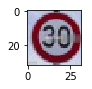

* 1 1.0000000000 Speed limit (30km/h)
  2 0.0000000000 End of all speed and passing limits
  3 0.0000000000 End of speed limit (80km/h)
  4 0.0000000000 Dangerous curve to the right
  5 0.0000000000 Keep right

Top 5 softmax probabilities for image filename 17-resized_no_entry.jpg:


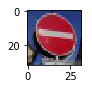

* 1 0.7149686813 No entry
  2 0.2850313485 Stop
  3 0.0000000045 No passing
  4 0.0000000005 Beware of ice/snow
  5 0.0000000000 No passing for vehicles over 3.5 metric tons

Top 5 softmax probabilities for image filename 18-resized_general_caution.jpg:


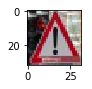

* 1 1.0000000000 General caution
  2 0.0000000000 End of no passing by vehicles over 3.5 metric tons
  3 0.0000000000 End of no passing
  4 0.0000000000 Roundabout mandatory
  5 0.0000000000 Keep left

Top 5 softmax probabilities for image filename 23-resized_slippery.jpg:


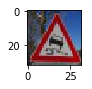

* 1 1.0000000000 Slippery road
  2 0.0000000000 No passing for vehicles over 3.5 metric tons
  3 0.0000000000 Dangerous curve to the left
  4 0.0000000000 Double curve
  5 0.0000000000 Go straight or right

Top 5 softmax probabilities for image filename 27-resized_pedestrians.jpg:


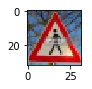

* 1 0.9999817610 Pedestrians
  2 0.0000178731 Bicycles crossing
  3 0.0000003924 General caution
  4 0.0000000047 Double curve
  5 0.0000000016 Speed limit (20km/h)

Top 5 softmax probabilities for image filename 28-resized_children.jpg:


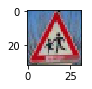

* 1 1.0000000000 Children crossing
  2 0.0000000000 Go straight or right
  3 0.0000000000 Bicycles crossing
  4 0.0000000000 Dangerous curve to the right
  5 0.0000000000 Bumpy road


In [7]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

num_best_scores_per_sign = 5
print("Listing top %d ranked softmax probabilities per image (correct choice flagged with '*')" % num_best_scores_per_sign)
for image_idx in range(num_internet):
    logits_this_sign = logits_out[image_idx]
    logit_classidx = []
    # Make a list of tuples mapping logit probability value to class ID for this sign
    for class_idx in range(len(logits_this_sign)):
        logit_classidx.append((logits_this_sign[class_idx],class_idx))
        
    logit_classidx.sort(reverse=True) # Now sorted highest-logit first so we can show top few
    
    print ("\nTop %d softmax probabilities for image filename %s:" %(num_best_scores_per_sign, internet_filenames[image_idx]))
    image = internet_images[image_idx]
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    plt.show() # Explicitly calling show() so it appears before next text line I want to output
    for idx in range(num_best_scores_per_sign):
        logit_value, class_idx = logit_classidx[idx]
        correct_flag = "*" if correct_internet_classes[image_idx] == class_idx else " "
        print("%s %d %.10f %s" % (correct_flag, idx+1, logit_value, class_descriptions[class_idx]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")